In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# تابع برای ایجاد داده‌ها با تعداد نمونه و پارامترهای مشخص
def generate_linear_data(num_samples, noise_std):
    np.random.seed(42)  # برای تولید داده‌های قابل تکرار
    X = 2 * np.random.rand(num_samples, 1)
    y = 4 + 3 * X + np.random.normal(0, noise_std, size=(num_samples, 1))
    return X, y

# تعداد نمونه‌ها و انحراف استاندارد نویز مورد نظر
num_samples_list = [5, 25, 100, 1000]
noise_std = 1.0

# تولید و نمایش داده‌ها برای هر تعداد نمونه
for num_samples in num_samples_list:
    X, y = generate_linear_data(num_samples, noise_std)
    print(f"\nNumber of Samples: {num_samples}")
    print("X:", X.flatten())
    print("y:", y.flatten())


Number of Samples: 5
X: [0.74908024 1.90142861 1.46398788 1.19731697 0.31203728]
y: [ 6.52628201 10.71480112  7.81108552  7.0667811   4.36473168]

Number of Samples: 25
X: [0.74908024 1.90142861 1.46398788 1.19731697 0.31203728 0.31198904
 0.11616722 1.73235229 1.20223002 1.41614516 0.04116899 1.9398197
 1.66488528 0.42467822 0.36364993 0.36680902 0.60848449 1.04951286
 0.86389004 0.58245828 1.22370579 0.27898772 0.5842893  0.73272369
 0.91213997]
y: [ 5.61776575 10.30200631 10.95145168  7.98618393  5.05833101  4.42053146
  3.74824782 10.1444967   7.89772407  7.61287573  3.10195477  9.65770373
  8.46100704  5.2685068   4.86149935  5.48977597  4.56033434  8.24053085
  9.36998315  6.94101457  7.88975568  5.7187242   4.74378255  4.61487685
  7.51012032]

Number of Samples: 100
X: [0.74908024 1.90142861 1.46398788 1.19731697 0.31203728 0.31198904
 0.11616722 1.73235229 1.20223002 1.41614516 0.04116899 1.9398197
 1.66488528 0.42467822 0.36364993 0.36680902 0.60848449 1.04951286
 0.86389004

In [3]:
# تابع برای آموزش مدل و رسم نمودار
def train_and_plot_models(X, y, degrees, num_samples):
    plt.figure(figsize=(15, 4))

    for i, degree in enumerate(degrees, 1):
        # اضافه کردن توان‌ها به ویژگی‌های ورودی
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly_features.fit_transform(X)

        # آموزش مدل رگرسیون خطی
        model = LinearRegression()
        model.fit(X_poly, y)

        # پیش‌بینی با استفاده از مدل
        X_new = np.linspace(0, 2, 100).reshape(100, 1)
        X_new_poly = poly_features.transform(X_new)
        y_pred = model.predict(X_new_poly)

        # رسم نمودار
        plt.subplot(1, len(degrees), i)
        plt.scatter(X, y, color='blue', label='Actual Data')
        plt.plot(X_new, y_pred, color='red', linewidth=2, label=f'Degree {degree} Model')
        plt.title(f'Model with Degree {degree}')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()

    plt.tight_layout()
    plt.show()


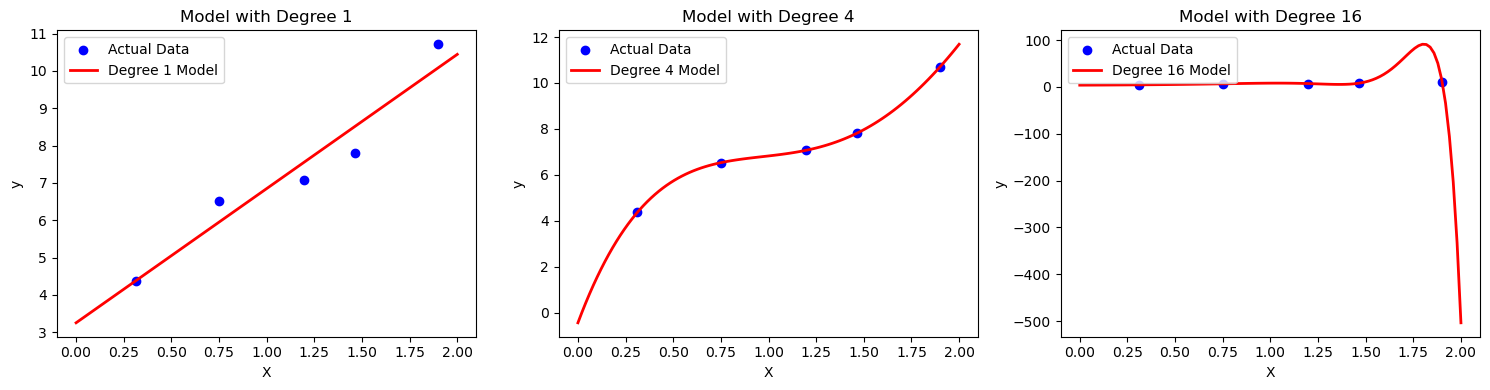

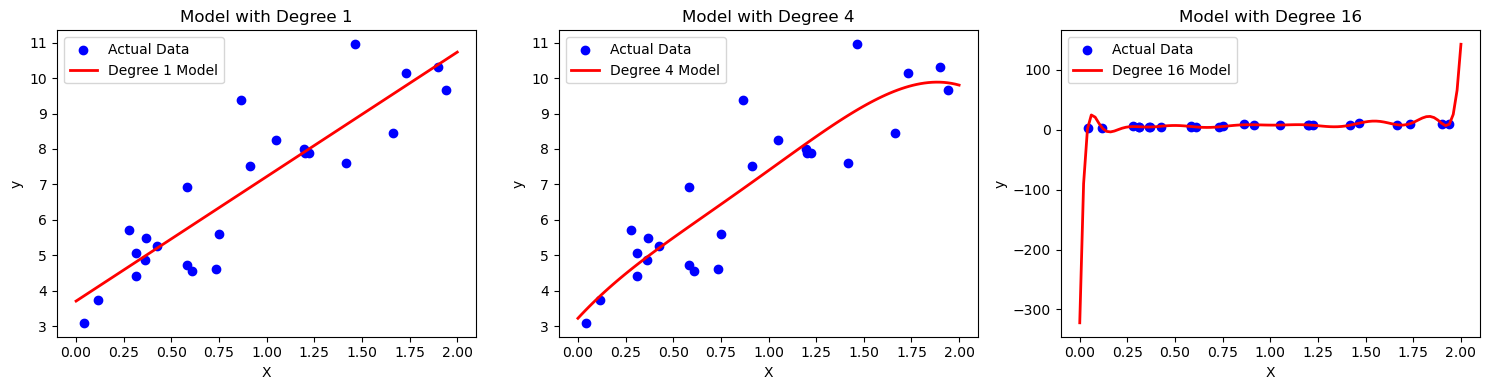

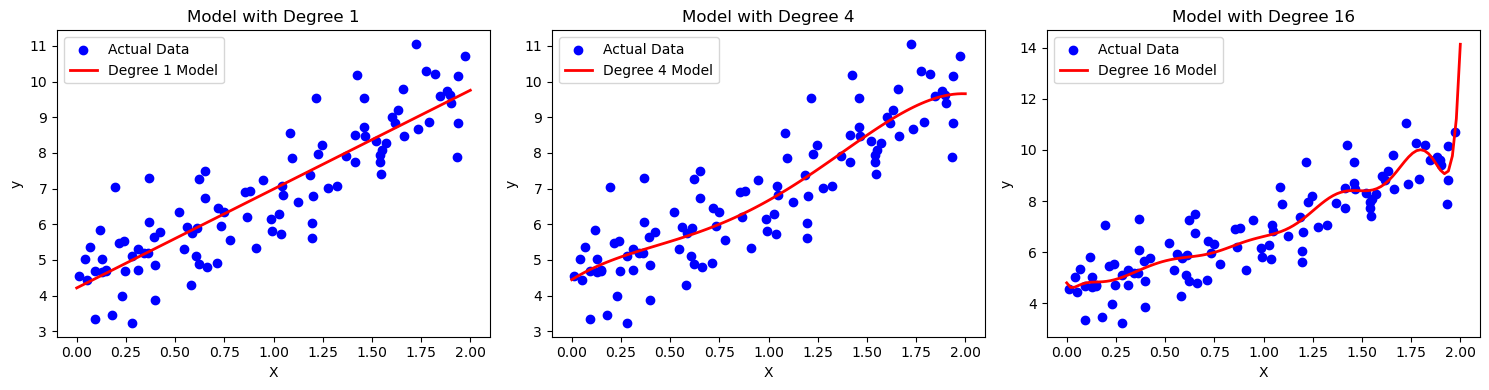

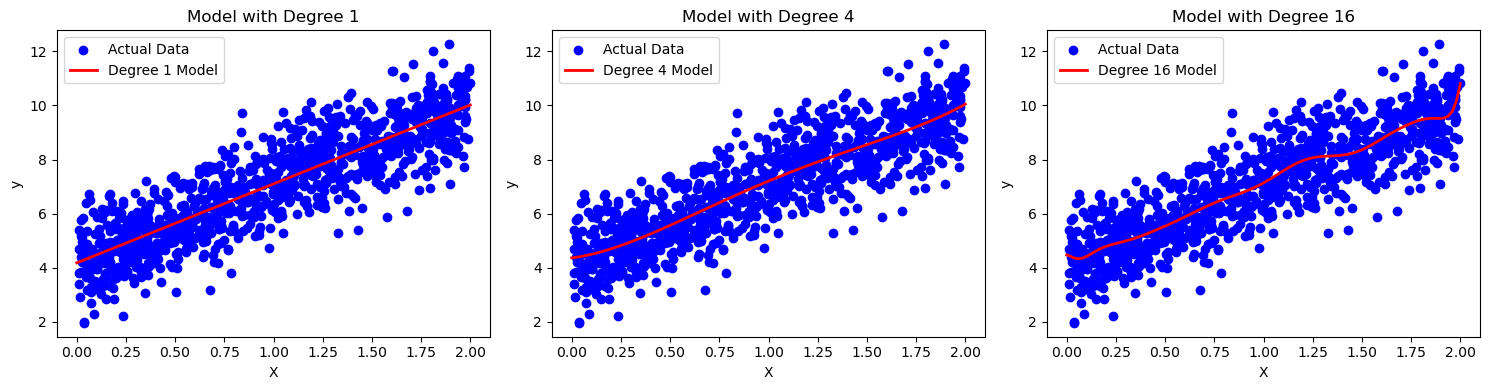

In [4]:
# تولید و آموزش مدل‌ها برای هر تعداد نمونه
for num_samples in num_samples_list:
    X, y = generate_linear_data(num_samples, noise_std)
    degrees = [1, 4, 16]
    train_and_plot_models(X, y, degrees, num_samples)

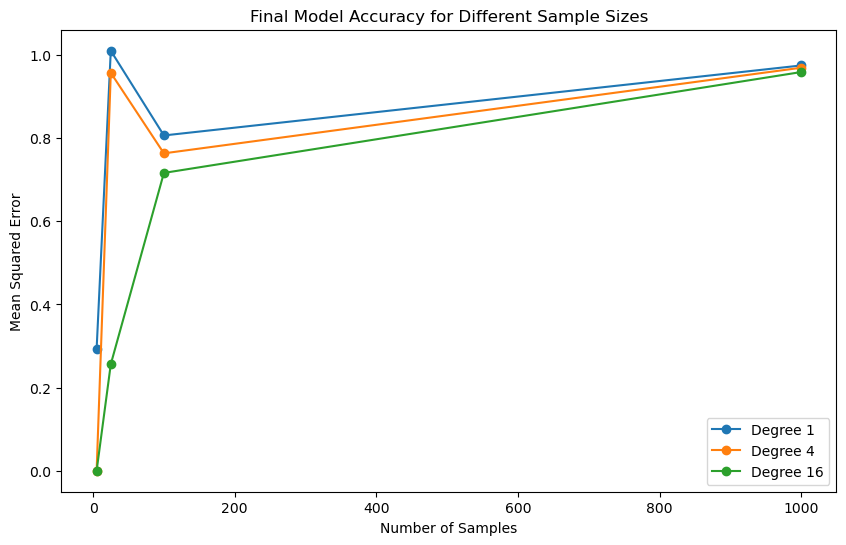

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# تابع برای آموزش مدل و محاسبه دقت نهایی
def train_and_evaluate_models(X, y, degrees):
    accuracies = []

    for degree in degrees:
        # اضافه کردن توان‌ها به ویژگی‌های ورودی
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly_features.fit_transform(X)

        # آموزش مدل رگرسیون خطی
        model = LinearRegression()
        model.fit(X_poly, y)

        # محاسبه دقت نهایی مدل
        y_pred = model.predict(X_poly)
        accuracy = mean_squared_error(y, y_pred)
        accuracies.append(accuracy)

    return accuracies

# تولید و آموزش مدل‌ها برای هر تعداد نمونه
accuracies_list = []
for num_samples in num_samples_list:
    X, y = generate_linear_data(num_samples, noise_std)
    degrees = [1, 4, 16]
    accuracies = train_and_evaluate_models(X, y, degrees)
    accuracies_list.append(accuracies)

# رسم نمودار دقت نهایی مدل‌ها
plt.figure(figsize=(10, 6))
for i, degree in enumerate(degrees):
    plt.plot(num_samples_list, [acc[i] for acc in accuracies_list], marker='o', label=f'Degree {degree}')

plt.title('Final Model Accuracy for Different Sample Sizes')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
